In [1]:
# Imports

import pandas as pd
import json
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set()

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer


# Feature selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, chi2, SelectPercentile
from sklearn.datasets import make_classification
from sklearn.decomposition import IncrementalPCA, PCA, SparsePCA


In [3]:
# Load data
with open("/content/domain1_train_data.json") as f:
    df_domain1 = pd.read_json(f, lines=True)

with open("/content/domain2_train_data.json") as f:
    df_domain2 = pd.read_json(f, lines=True)

df_combined = pd.concat([df_domain1.assign(label=0),df_domain2.assign(label=1)], ignore_index = True)
df_combined

,text,label,id
0,"[16, 231, 543, 5, 15, 43, 8282, 94, 231, 1129,...",0,0
1,"[16, 4046, 138, 10, 2, 1809, 2007, 3763, 14, 4...",0,1
2,"[1108, 16550, 3, 6168, 3, 160, 284, 19, 49, 46...",0,2
3,"[1802, 27, 16, 25, 48, 451, 632, 3, 2, 2164, 2...",0,3
4,"[16, 19, 302, 93, 97, 43, 952, 118, 1, 16, 528...",0,4
...,...,...,...
17995,"[8, 15, 71, 12, 155, 6903, 3, 7, 2300, 352, 37...",1,17995
17996,"[12, 155, 7, 420, 4, 228, 89, 206, 5157, 10, 5...",1,17996
17997,"[216, 2, 379, 4, 7, 332, 179, 386, 160, 28, 11...",1,17997
17998,"[7, 2787, 9, 1026, 7, 5376, 620, 1, 4303, 7, 1...",1,17998


In [11]:
# TF-IDF Tokenizer
def tfidf_tokenizer(self):
  return self

In [12]:
# Null tf-idf
null_tfidf = TfidfVectorizer(max_features=7500,lowercase=False, tokenizer=tfidf_tokenizer)
# Domain 1
domain1_null_X = null_tfidf.fit_transform(df_domain1['text'])
domain1_null_y = df_domain1['label']
# Domain 2
domain2_null_X = null_tfidf.fit_transform(df_domain2['text'])
domain2_null_y = df_domain2['label']
# Combined domain
domains_null_X = null_tfidf.fit_transform(df_combined['text'])
domains_null_y = df_combined['label']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Combined domain shape Counter({1: 13000, 0: 5000})


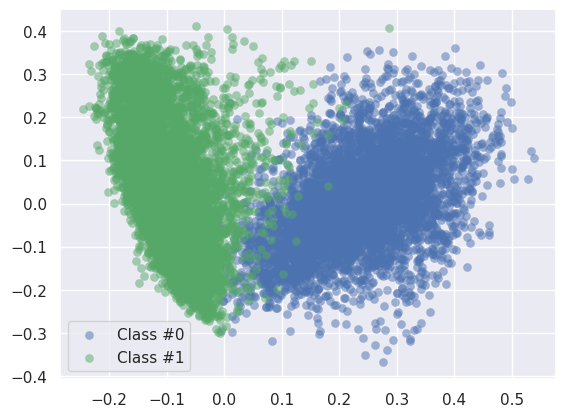

In [13]:
pca = PCA(n_components=2)

# Visualization
print('Combined domain shape %s' % Counter(domains_null_y))

domains_null_vis = pca.fit_transform(domains_null_X.toarray())

# Visualization
palette = sns.color_palette()
plt.scatter(domains_null_vis[domains_null_y == 0, 0], domains_null_vis[domains_null_y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(domains_null_vis[domains_null_y == 1, 0], domains_null_vis[domains_null_y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

In [14]:
# Domain 1 tf-idf w/ max_df and min_df
limited_tfidf = TfidfVectorizer(min_df=5, max_df=0.7, max_features=7500, lowercase=False, tokenizer=tfidf_tokenizer)
# Combined domain
domains_X = limited_tfidf.fit_transform(df_combined['text'])
domains_y = df_combined['label']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Domain 1 shape Counter({1: 13000, 0: 5000})


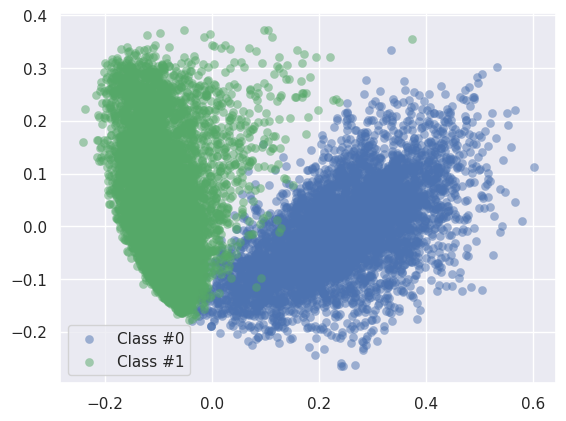

In [15]:
# Visualization
print('Domain 1 shape %s' % Counter(domains_y))

domains_vis = pca.fit_transform(domains_X.toarray())

# Visualization
palette = sns.color_palette()
plt.scatter(domains_vis[domains_y == 0, 0], domains_vis[domains_y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(domains_vis[domains_y == 1, 0], domains_vis[domains_y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

In [9]:
# SVM grid search for params
C_range = np.logspace(-2, 2, 5)
param_grid = dict(kernel=['linear'], C=C_range, class_weight=[None, 'balanced'])

grid = GridSearchCV(SVC(), param_grid=param_grid, refit = True, verbose = 3)
grid.fit(domains_X, domains_y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.01, class_weight=None, kernel=linear;, score=0.972 total time= 1.6min
[CV 2/5] END C=0.01, class_weight=None, kernel=linear;, score=0.969 total time= 1.6min
[CV 3/5] END C=0.01, class_weight=None, kernel=linear;, score=0.973 total time= 1.6min
[CV 4/5] END C=0.01, class_weight=None, kernel=linear;, score=0.969 total time= 1.5min
[CV 5/5] END C=0.01, class_weight=None, kernel=linear;, score=0.971 total time= 1.5min
[CV 1/5] END C=0.01, class_weight=balanced, kernel=linear;, score=0.988 total time= 1.9min
[CV 2/5] END C=0.01, class_weight=balanced, kernel=linear;, score=0.986 total time= 1.9min
[CV 3/5] END C=0.01, class_weight=balanced, kernel=linear;, score=0.987 total time= 1.9min
[CV 4/5] END C=0.01, class_weight=balanced, kernel=linear;, score=0.984 total time= 1.9min
[CV 5/5] END C=0.01, class_weight=balanced, kernel=linear;, score=0.986 total time= 1.9min
[CV 1/5] END C=0.1, class_weight=None, kernel=lin

In [16]:
# The best parameters are {'C': 10.0, 'class_weight': None, 'kernel': 'linear'} with a score of 1.00
svm_domain_classifier = SVC(C=10.00, gamma=1.0, kernel='linear')
svm_domain_classifier.fit(domains_X, domains_y)

SVC(C=10.0, gamma=1.0, kernel='linear')

In [17]:
# Export model
import pickle as pkl
with open("svm_domain_classifier.pkl", "wb") as writefile:
    pkl.dump([limited_tfidf, svm_domain_classifier], writefile)

In [19]:
# Export pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tfidf', limited_tfidf),
    ('svc', svm_domain_classifier)
])

import pickle as pkl
with open("joey_svm_domain_clf_pipeline.pkl", "wb") as writefile:
    pkl.dump([pipe, limited_tfidf, tfidf_tokenizer, svm_domain_classifier], writefile)
